In [1]:
from astropy.io import fits
import numpy as np
import seaborn as sns


In [25]:
quasar_cata = fits.getdata('/uufs/chpc.utah.edu/common/home/astro/zheng/hd/data/SDSS16Q/DR16Q_v4.fits')
z = quasar_cata[quasar_cata['Z'] > 0]['Z'].astype(float)
lower, middle, higher = np.percentile(z, [30, 50, 70])
quasar_cata_cut = quasar_cata[np.logical_and(quasar_cata['Z']<higher, quasar_cata['Z']>lower)]

<Axes: ylabel='Count'>

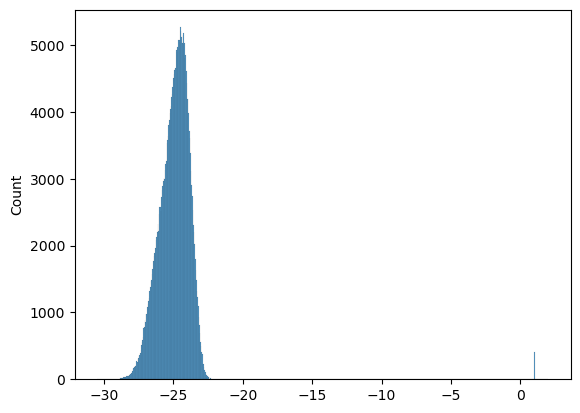

In [7]:
sns.histplot(quasar_cata_cut['M_I'].astype(float))

In [6]:
middle = np.percentile(quasar_cata_cut['M_I'], 50)

In [8]:
quasar_cata_luminosity = [
    quasar_cata_cut[quasar_cata_cut['M_I']<=middle],
    quasar_cata_cut[quasar_cata_cut['M_I']>middle]
]

In [10]:
name = ['high', 'low']
for i in range(2):
    quasar = np.zeros(len(quasar_cata_luminosity[i]), dtype=[('ra', 'f8'), ('dec', 'f8'), ('z', 'f8'), ('w', 'f8')])
    quasar['ra'] = quasar_cata_luminosity[i]['RA']
    quasar['dec'] = quasar_cata_luminosity[i]['DEC']
    quasar['z'] = quasar_cata_luminosity[i]['Z']
    quasar['w'] = 1
    np.save(f'../catalogue/quasar_narrow_z_cut_{name[i]}', quasar)


In [11]:
rand_theta, rand_phi, rand_z = np.load('../catalogue/random_sample_quasar.npy')

In [12]:
from astropy import coordinates as coo, units as u

In [14]:
rand = np.zeros(len(rand_phi), dtype=[('ra', 'f8'), ('dec', 'f8'), ('z', 'f8'), ('w', 'f8')])
coord = coo.SkyCoord(l=rand_phi, b=np.pi/2-rand_theta, unit='rad', frame='galactic')

In [19]:
rand['ra'] = coord.icrs.ra.to(u.deg).value
rand['dec'] = coord.icrs.dec.to(u.deg).value
rand['z'] = rand_z
rand['w'] = 1

In [24]:
np.save('../catalogue/random_sample_quasar.npy', rand)

In [26]:
rand_cut = rand[np.logical_and(rand['z']<higher, rand['z']>lower)]

In [28]:
np.save('../catalogue/random_sample_quasar_narrow_z_cut.npy', rand_cut)